<div style='display: flex; flex-direction: row; align-items: center; justify-content: space-between; color: black;  background: #fbe216; margin-right: 50px; height: 100px;'>
<h1 style="width: 90%; text-align: center; padding-top: 20px; font-weight:bold;">Projet Algorithmique Avancée</h1>
<img src="https://www.cesi.fr/wp-content/uploads/2022/07/lg_cesi.png" style="width: 100px; height: 100px;">
</div>
<h4 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Sommaire</h4>

<h4 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;' id="prerequisites">Prérequis</h4>

Ce document intégre des codes Python. Pour pouvoir les exécuter, les paquets ci-après sont requis. Il suffit simplement de lancer la prochaine cellule pour les installer automatiquement dans l'environnement en cours.

In [1]:
!pip install numpy
!pip install matplotlib
!pip install networkx
!pip install pulp

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import pulp
import time
from ipywidgets import IntProgress
from IPython.display import display
import itertools

<p>
    Aujourd'hui, la réduction des émissions de gaz à effet de serre est un enjeu prioritaire pour de nombreux pays. De nombreux accords ont été signés entre les états. Les premiers engagements, sont apparus lors de la signature du protocole de Kyoto en 1997. Les scientifiques jugent aujourd'hui insuffisant l'entrée en vigueur de ce protocole face à l'avancement du réchauffement climatique.<br/>
    L'action est donc portée sur un changement des comportements au sein de notre société pour essayer de diminuer notre impact environnemental. Ceci commence notamment avec une adaptation de l'usage des transports.
</p>

<h4 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;' id="team">Présentation de l'équipe en charge du projet</h4>

<table style="border: none;">
    <tbody style="border: none;">
        <tr style="border: none;">
            <td style="border: none;">
                <img src="https://dsm04pap003files.storage.live.com/y4mrPh_yseUFfOwtw3T7wvGeQdKdXiR8yh_3CjvI4iWvuvra7VV8dRTKsZiE8hJ3bolrevZjC4hL0yRh8Edzq-e4zxUuJYBrx8DIjYvzTb5UAf64CuMMSt1zzjMv4d5rmrqqCsrEo2S3wWh9E2eHvMYpyy9XcvZo7fkQf1O2inCrm7TLMXn8L3dUK7HSEvVABnb?width=800&height=800&cropmode=center" />
            </td>
            <td style="border: none;">
                <img src="https://dsm04pap003files.storage.live.com/y4mdrJBIrMjk5K4hzU8-NjQcWUPl16XfAnWJ3A8cQO9quUGBzFtPOWRlPFmVbyz65M2lWD-zj44bSaP7I4jEHGwNh71ojMqM0wlAX-iRZzav3XJugn5CBOQzmWqGmCvlJtYhk_7WIJYEF7cCXavTmJYvPaOyNrqrK_s2Vq7pGAvvwCw2MhIsyp-E1UMCmL1G6Lu?width=800&height=800&cropmode=none" />
            </td>
            <td style="border: none;">
                <img src="https://dsm04pap003files.storage.live.com/y4moTSNS4nfGmU6y_-tBqjzSg2T1fbVCmQv0BRlF96XsCtOaxYssk6atj-pjWt9igxxffMkB30nwdea-QVGu4KllEAKuJ5zmtOJNEznMIDbg0NebAFskm70eaCtgsaKJ0uNMK4O9EWekPkDejQRAQZP2THzIexzWX124wwKoBW2Y83Ib2Ux7hlUpMf5a2qlkaFy?width=800&height=800&cropmode=center" />
            </td>
            <td style="border: none;">
                <img src="https://media.licdn.com/dms/image/C4E03AQG1N6JHdPo1Tg/profile-displayphoto-shrink_800_800/0/1632410457548?e=1691020800&v=beta&t=m4IyU1snzhLHpoNZJk5ducohQaV4ppT-lrrEFjJfJrI">
            </td>
        </tr>
        <tr style="border: none;">
            <td style="border: none;">
                <p style="text-align: center; font-weight:bold;">Victor BILLAT <br/><br/> <span style="font-weight:normal;">Chef de projet</span></p>
            </td>
            <td style="border: none;">
                <p style="text-align: center; font-weight:bold;">Vincent VERLAAN</p>
            </td>
            <td style="border: none;">
                <p style="text-align: center; font-weight:bold;">Valentin GIRAUDEAU</p>
            </td>
            <td style="border: none;">
                <p style="text-align: center; font-weight:bold;">Maxime DUCASSE</p>
            </td>
        </tr>
    </tbody>
<table>
<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Identification du problème</h2>
    <p>
        Pour répondre, à l'appel d'offre lancé par l'ADEME (Agence de l'Environnement et de la Maîtrise de l'Energie), notre équipe CesiCDP décide d'orienter son travail sur la gestion de tournées de livraison. Pour cela, nous souhaitons mettre en place une solution algorithmique permettant de minimiser le temps d'une tournée de livraison entre différentes villes au travers d'un réseau routier.
        <br/>
        L'objectif de ce projet consiste en :
    </p>
    <ul>
        <li>La réalisation d'un algorithme capable d'accueillir des entrées de tailles variables.</li>
        <li>Une étude statistique du comportement du dit algorithme.</li>
    </ul>
    <h4 style="color: #fbe216">Contraintes :</h4>
        <p>
            Nous avons fait le choix d'implémenter certaines contraintes à notre projet pour essayer d'obtenir des résultats plus réalistes qui tiennent compte de contraintes techniques du domaine des transports routiers. Parmis une liste de suggestions, nous en avons sélectionné deux pour notre problème :
        </p>
        <ul>
            <li><strong>Traffic :</strong> L'algorithme sera capable de prendre en compte des évolutions du trafic sur les différents axes en fonction des horaires de la journée. Ceci aura un impact sur la vitesse de déplacement de nos camions. Ainsi, le temps du circuit de livraison pourra être impacté.</li>
            <li><strong>Nombre de camions :</strong> L'algorithme devra tenir compte d'un nombre de camions disponibles simultanément pour pouvoir répartir les livraisons. Le calcul de la tournée inclura l’affectation des objets (et donc des points de livraison) aux différents camions disponibles, et minimisera la date de retour du dernier camion au dépôt.
            </li>
        </ul>
    <h4 style="color: #fbe216">Autres problèmes connus :</h4>
        <p>
            Notre problème correspond au <strong>problème de tournées des véhicules (Véhicule Routing Problem, VRP)</strong>. Ce dernier cherche à déterminer les différents trajets empruntés par une flotte de véhicules pour livrer différents clients avant de revenir au dépôt. Le but de ce problème est de minimiser le temps de livraison des différents produits.
        </p>
        <p>
            Le problème VRP est un dérivé de celui du <strong>voyageur du commerce (Travelling Salesman Problem, TSP)</strong>. Ce dernier ne prend en considération qu'un seul véhicule pour effectuer la tournée et ainsi consiste à déterminer, selon un ensemble de villes et les distances les séparant, une tournée la plus courte pour livrer chacune des villes une et une seule fois. Ceci revient à chercher le plus court cycle hamiltonien dans un graphe G.
        </p>


<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;' id="problem">Définition mathématique du problème</h2>
    <h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="decision">Problème de décision</h4>
    <p>
        Durant notre projet, nous allons chercher à répondre au problème de décision suivant : 
        <em>"Est-il possible de créer des itinéraires pour un ensemble de véhicules, partant tous d'un même dépôt, afin de livrer des marchandises à un ensemble de clients, en tenant compte des conditions de circulations, de sorte à minimiser le temps total de livraison ?"</em>        
    </p>

En prenant en compte un graphe pondéré $G$ dont les sommets $V_i$ (de l'ensemble des sommets $V$) représentent les villes et dont les arêtes $E_j$ (de l'ensemble des arêtes $E$) représentent les routes entre chacune de ces villes, le problème de décision précédent devient : <em>"Est-il possible de trouver dans $G$, $n$ cycles où chaque cycle représente le trajet d'un véhicule partant tous d'un même sommet $V_0$, afin que chaque sommet soit dans un cycle et de sorte à minimiser le temps de livraison $t$ ?"</em>

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="optimisation">Problème d'optimisation</h4>

De ce problème de décision, nous allons chercher à optimiser le temps de livraison. Ce temps commence lorsque tous les camions partent en même temps du dépôt puis se termine lorsque le dernier camion revient au dépôts. Pour cela, on formule le problème d'optimisation suivant : "Quelle est la plus petite valeur de $t$ pour laquelle la réponse au problème de décision est 'oui'" ?

<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;' id="complexity">Complexité</h2>

Pour savoir dans quelle classe de complexité se situe notre problème, on va chercher à déterminer si :
- Il peut être résolu en temps polynomial, il sera polynomial, alors il appartiendra à la classe $\text{P}$,
- Il peut être vérifiable mais non résolvable en temps polynomial, alors il appartiendra à la classe $\text{NP}$,
- Il est possible de réduire tout problème à ce problème, alors il appartiendra à la classe $\text{NP-Difficile}$,
- Il appartient à la fois à la classe $\text{NP}$ et à la classe $\text{NP-Difficile}$, alors il appartient aussi à la classe $\text{NP-Complet}$

Commençons par voir s'il est possible de vérifier qu'une proposition est bien solution de notre problème en trouvant un algorithme capable de faire cette validation en temps polynomial. Un algorithme dans ce cas pourrait être le suivant :

<div>
    <p> Soit une liste <strong>L</strong> de <strong>n</strong> cycles notés (<strong>C<sub>i</sub></strong> pour <strong>i</strong> allant de <strong>1</strong> à <strong>n</strong>). On crée un dictionnaire <strong>D</strong> ayant pour paire clé/valeur un sommet et un booléen.<br/>
    Exemple : <code>D={S<sub>1</sub>: True, ... S<sub>n</sub>: False}</code>
    </p>
    <blockquote>
    <p>
        Pour chaque cycle <strong>C<sub>i</sub><br/></strong>
        <span style="padding-left: 30px;">
        Si le point de départ n'est pas le même qu'à l'arrivée et qu'il ne correspond pas au dépôt
        </span><br/>
        <span style="padding-left: 60px;">
            La solution n'est pas valide
        </span><br/>
        <span style="padding-left: 60px;">
            On arrête le programme
        </span><br/>
        <span style="padding-left: 30px;">
            Pour chaque sommet <strong>S</strong> du cycle <strong>C<sub>i</sub></strong>
        </span><br/>
        <span style="padding-left: 60px;">
            Si la valeur du dictionnaire pour le sommet <strong>S</strong> est <strong>Vrai</strong>
        </span><br/>
        <span style="padding-left: 90px;">
            Le sommet a déjà été visité donc la solution n'est pas valide
        </span><br/>
        <span style="padding-left: 90px;">
            On arrête le programme
        </span><br/>
        <span style="padding-left: 60px;">
            Sinon
        </span><br/>
        <span style="padding-left: 90px;">
            On met la valeur du dictionnaire pour le sommet <strong>S</strong> à <strong>1</strong>
        </span><br/>
        Pour chaque sommet <strong>S<sub>i</sub></strong> du dictionnaire<br/>
        <span style="padding-left: 30px;">
        Si le sommet n'a pas été visité
        </span><br/>
        <span style="padding-left: 60px;">
            La solution n'est pas valide
        </span><br/>
        <span style="padding-left: 60px;">
            On arrête le programme
        </span><br/>
    </p>
    </blockquote>
<div>

<p>
On peut appliquer cet algorithme à un exemple pour vérifier sa fonctionnalité :
</p>

<div style="display:flex; flex-direction:row; justify-content: space-between;">
    <img style="width: 500px;" src="https://i.imgur.com/u5V0Bhv.png">
    <img style="width: 500px;" src="https://i.imgur.com/mi2oN6d.png">
</div>

In [3]:
def is_solution_valid(individual, num_clients, number_of_trucks, starting_point=0):
    dict_clients = {i:0 for i in range(0, num_clients + 1)}
    is_valid = True

    if len(individual) != number_of_trucks:
        print("Number of trucks is not correct")
        is_valid = False

    for truck, trajet in individual.items():
        # Check if starting point and ending point are the same
        if trajet[0] != starting_point or trajet[-1] != starting_point:
            print(f"The tour of truck {truck} does not start and end at the starting point with id {starting_point}")
            is_valid = False
            break
        
        # Count the number of visits for each client
        for client in trajet[1:-1]:
            dict_clients[client] += 1

    # Check if a client is visited more than once
    for client, nb_visits in dict_clients.items():
        if nb_visits != 1 and client != starting_point:
            print(f"Client {client} is visited {nb_visits} times")
            is_valid = False
            break

    return is_valid

print(is_solution_valid({0:[2, 0, 1, 3, 2], 1:[2, 5, 4, 2]}, 5, 2, starting_point=2))

True


Comme on peut le voir, notre algorithme de vérification va contrôler les $n$ sommets de notre graphe afin de s'assurer qu'ils sont tous visités une et une seule fois par un camion lors de sa tournée de livraison. Ce programme a donc une complexité qui est polynomial valant : $O(N)$.
Ainsi, le problème étant vérifiable de façon polynomial, nous pouvons attribuer ce dernier à la classe $NP$.

De plus, notre problème s'apparente à celui du voyageur du commerce qui est $\text{NP-Complet}$ c'est-à-dire qu'il appartient aussi bien à la classe $NP$ qu'à la classe $\text{NP-Difficile}$. Pour rappel, le voyageur du commerce est un problème qui consiste à déterminer s'il existe un cycle qui parcourt tous les sommets d'un graphe une et une seule fois.
<br/><br/>
Dans notre cas, notre programme est capable de résoudre un problème similaire en ayant $k$ véhicules qui livrent. Ainsi, une instance $I$ du voyageur du commerce, peut être réduite à une instance $I_2$ de notre problème en prenant $k=1$. Cette réduction, nous permet d'associer un problème $\text{NP-Difficile}$ à notre problème $NP$. Ceci rend notre problème au moins aussi difficile qu'un problème de la classe $\text{NP-Difficile}$. On peut ainsi dire que le problème de tournées de véhicules auquel nous essayons de répondre, appartient à la classe $NP$ et $\text{NP-Difficile}$ ce qui le rend $\text{NP-Complet}$.

<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;' id="equations">Modélisation mathématique du problème</h2>

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="variables">Variables</h4>

$G$ : Un graphe complet pondéré avec $n$ sommets<br/>
$K$ : l'ensemble de tous les camions participant à la tournée <br/>
$N$ : l'ensemble des nombres entiers positifs <br/>
$V$ : l'ensemble des $n$ sommets du graphe $G$ <br/>
$E$ : l'ensemble des arêtes du graphe $G$ <br/>
$k$ : un camion donné de l'ensemble $K$ <br/>
$x_{ij}$ : une variable booléene vérifiannt : "L'arête entre le sommet $i$ et le sommet $j$ est empruntée", d'où $x_{ijk}$ une variable booléene vérifiannt "L'arête entre le sommet $i$ et le sommet $j$ est empruntée par le camion $k$" <br/>
$y_{i}$ : une variable booléene vérifiantn : "Le sommet $i$ est visité", d'où $y_{ik}$ une variable booléen vérifiant ne"Le sommet $i$ est visité par le camion $k$ <br/>
$c_{ij}(h)$ : le poids de l'arête entre le sommet $i$ et le sommet $j$ à l'heure $h$

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="function">Fonction Economique</h4>

$$\text{Minimiser} \qquad \sum_{k \in K}\sum_{i \in V}\sum_{j \in V}{x_{ijk} c_{ij}(h)}$$
<!-- $$\min \sum_{i=0}^{n} \sum_{j=0}^{n} \sum_{k=1}^{K} \sum_{t=0}^{T-1} c_{ijt} \cdot x_{ijkt}$$ -->

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="constraint">Contraintes</h4>

<!-- - Chaque véhicule quitte le client qu'il visite -->

<!-- $$\sum_{i=0}^{n}x_{ijk} = \sum_{i=0}^{n}x_{jik} \qquad \forall j \in \{0,...,n\},\quad \forall k \in \{0,...,|K|\}$$ -->

<!-- $$\sum_{i=0}^{n} x_{ijkt} = \sum_{i=0}^{n} x_{jikt} \qquad \forall k \in \{1, ..., K\}, \forall j \in \{1, ..., n\}, \forall t \in \{0, ..., T-1\}$$ -->

<!-- - Chaque client est visité une seule fois -->

<!-- $$\sum_{k=0}^{|K|} \sum_{i=0}^{n}x_{ijk}=1 \qquad \forall j \in \{1,...,n\}$$ -->

<!-- $$\sum_{k=1}^{K} \sum_{t=0}^{T-1} \sum_{i=0}^{n}x_{ijkt}=1 \qquad \forall j \in \{1, ..., n\}$$ -->

<!-- - Chaque camion quitte le dépôt à l'heure de départ (heure 0) -->

<!-- $$\sum_{j=1}^{n}x_{0jk0}=1 \qquad \forall k \in \{0,...,|K|\}$$ -->

<!-- - Elimination des sous-tours avec la méthode de Dantzig, Fulkerson et Johnson -->

<!-- <!-- $$y_{ikh} - y_{jkh} + (n+1) \cdot x_{ijkh} \leq n \qquad \forall i \in \{1, ..., n\}, \forall j \in \{1, ..., n\}, i \neq j, \forall k \in \{1, ..., K\}, \forall h \in \{0, ..., 24\} $$ --> 

 - Chaque client est visité une seule fois

 $$\sum_{j=1}^{n}\sum_{k=1}^{K} x_{ijk} = 1 \quad \forall i \in \{1, \ldots, n\}$$

 - Chaque véhicule quitte le dépôt

 $$\sum_{j=1}^{n} x_{0jk} = 1 \quad \forall k \in \{1, \ldots, K\}$$

 - Chaque véhicule revient au dépôt 

 $$\sum_{i=1}^{n} x_{i0k} = 1 \quad \forall k \in \{1, \ldots, K\}$$

 - Lorsqu'un véhicule visite un client, il doit aussi partir de ce client

 $$\sum_{j=1}^{n} x_{ijk} - \sum_{j=1}^{n} x_{jik} = 0 \quad \forall i \in \{1, \ldots, n\}, \forall k \in \{1, \ldots, K\}$$

 - Elimination des sous-tous

 $$0 \le y_{ik} \le n \quad \forall i \in \{1, \ldots, n\}, \forall k \in \{1, \ldots, K\}$$
 $$y_{ik} - y_{jk} + n*x_{ijk} \le n-1 \quad \forall i, j \in \{1, \ldots, n\}, i \neq j, \forall k \in \{1, \ldots, K\}$$



<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;' id="resolution">Méthode de résolution</h2>

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="structure">Structure de données envisagée</h4>
        
On compte générer notre graphe à l'aide d'une matrice d'adjacence de taille $n$ correspondant au nombre de sommet du graphe.

$$M_{i, j} = \begin{pmatrix} S_{1,1} & S_{1,2} & \cdots & S_{1,j} \\ S_{2,1} & S_{2,2} & \cdots & S_{2,j} \\ \vdots  & \vdots  & \ddots & \vdots  \\ S_{i,1} & S_{i,2} & \cdots & S_{i,j} \end{pmatrix}$$

$$\forall i \in [0,n] ; \text{et} ; \forall j \in [0,n]$$

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="graph">Type de graphe à tester</h4>
    Nous allons réaliser le projet sur des graphes connexes. 
    Nous allons générer un graphe complet pour s'assurer que chacune de nos villes soit atteignable.
    Pour la taille des graphes, nous allons générer trois instances. Un graphe à 10 sommets, un deuxième à 100 sommets et un dernier à 1000 sommets.
    Les graphes seront pondérés en fonction du temps de parcours.
<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="gengraph">Méthode de génération des graphes</h4>

Pour générer les graphes, nous allons générer leur matrice d'adjacence. Pour cela, étant donné que nos graphes ne sont pas orientés, nous allons générer une moitié de la matrice et par symétrie remplir la seconde moitié. Le code ci-dessous reprend ce procédé :

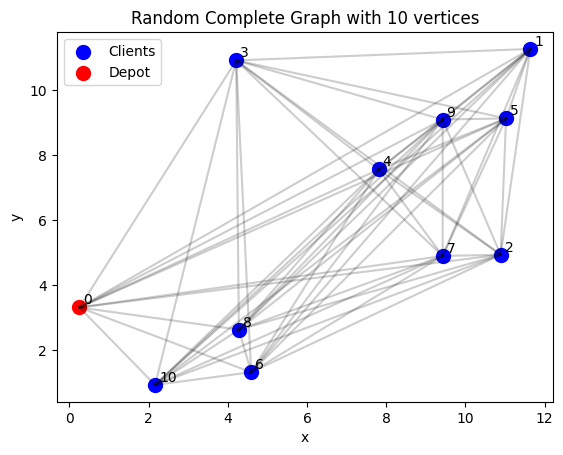

In [4]:
def generate_random_graph(n=10, weight_range=(1, 10)):
    """
    Generate a random graph with n nodes and random weights
    """
    xc = np.random.rand(n + 1)*12
    yc = np.random.rand(n + 1)*12

    # Generate initial traffic matrix
    adjacency_matrix = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(n + 1):
            if i != j:
                adjacency_matrix[i, j] = np.sqrt((xc[i] - xc[j])**2 + (yc[i] - yc[j])**2)
                adjacency_matrix[j, i] = adjacency_matrix[i, j]

    return adjacency_matrix, xc, yc

n = 10 # Nombre de sommets
matrix, xc, yc = generate_random_graph(n)

plt.scatter(xc[1:], yc[1:], s=100, c='b', label="Clients")
plt.scatter(xc[0], yc[0], s=100, c='r', label="Depot")

# Draw edges
for i in range(n + 1):
    for j in range(n + 1):
        if i != j:
            plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='k', alpha=0.1)

# Annotations for nodes
for i in range(n + 1):
    plt.annotate(i, (xc[i] + 0.1, yc[i] + 0.1))

plt.title(f"Random Complete Graph with {n} vertices")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;' id="algo">Algorithme de résolution</h2>
<p>Pour trouver une solution à notre VRP, nous nous sommes penchés sur les méta-heuristiques. Ces algorithmes peuvent être adaptés à des problèmes différents et peuvent donner une des solutions de qualités dans temps optimal.</p>
Nous avons décidé de choisir comme méta-heuristique un algorithme génétique pour résoudre notre problème. Un algorithme génétique utilise les principes de l'évolution biologique pour trouver des solutions. De plus, on peut facilement adapter notre problème à cet algorithme car nos sommets sont des gènes, un cycle est un chromosome et l'ensemble des cycles de k camions est un individu. Cette métaheuristique est aussi flexible au niveau de l'ajout des contraintes, notamment à l'aide de la fonction fitness qui sélectionne les meilleurs éléments d'une génération mais qui est paramétrable.


<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="implem">Implémentation</h4>
<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="traffic">Fonction Traffic</h5>

Pour commencer l'implémentation de notre algorithme génétique, nous allons tout d'abord commencer par définir la fonction qui permettra de représenter les variations de trafic en fonction de l'heure. Celle-ci renverra un coefficient multiplicateur qui sera appliqué au poids de l'arête visitée.

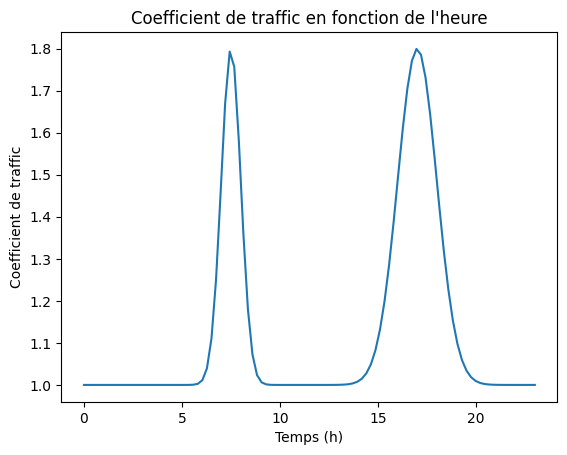

In [5]:
def traffic(x):
    return (0.8 * np.exp(-(x-7.5)**2 / (2 * 0.5**2)) + 0.8 * np.exp(-(x-17)**2 / (2 * 1**2))) + 1

x = np.linspace(0, 23, 100)
plt.plot(x, traffic(x))
plt.title("Coefficient de traffic en fonction de l'heure")
plt.xlabel("Temps (h)")
plt.ylabel("Coefficient de traffic")
plt.show()

<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="init">Phase d'initialisation</h5>
Les algorithmes génétiques sont des méthodes d'optimisation et de recherche basées sur les principes de la génétique et de la sélection naturelle fondée grâce à la théorie de Darwin.
Pour fonctionner, ces algorithmes utilisent les concepts biologiques de la reproduction entre individus, de la mutation génétique et de la sélection pour explorer un espace de recherche afin de déterminer des solutions optimales.<br/>
La première phase du problème consiste à créer des individus qui représenteront des solutions candidates.
Nos solutions ont la forme suivante :<br/>

$$
    \begin{cases}
        v_1 : 0 \quad 1 \quad 6 \quad 5 \quad 0 \\ 
        v_2 : 0 \quad 2 \quad 3 \quad 8 \quad 0 \\
        v_3 : 0 \quad 4 \quad 9 \quad 7 \quad 0
    \end{cases}
$$

Chaque véhicule a une tournée qui lui est associée. Pour pouvoir ensuite facilement réaliser nos opérations de croisement et de mutation, nous allons représenter les chromosomes sous une autre forme en soustrayant le point de départ et d’arrivée et en concaténant les points de chaque véhicule :

$$
\begin{cases}
    indices : 0 \quad 3 \quad 6 \\ 
    chromosome : 1 \quad 6 \quad 5 \quad 2 \quad 3 \quad 8 \quad 4 \quad 9 \quad 7
\end{cases}
$$

On peut ainsi mettre en place une fonction permettant de générer ces individus :

In [6]:
def create_individual(nb_truck, nb_client, starting_point=0):
    """
    Create a random individual
    """
    individual = {}
    clients = list(range(1, nb_client))
    random.shuffle(clients)
    
    groups = np.array_split(clients, nb_truck)
    for i, group in enumerate(groups):
        individual[i] = [starting_point] + list(group) + [starting_point]
    return individual

individual = create_individual(3, 9, starting_point=0)
print("Individual:",individual)

Individual: {0: [0, 1, 5, 8, 0], 1: [0, 7, 2, 6, 0], 2: [0, 4, 3, 0]}


On le voit cette fonction génère un individu qui est représenté selon la première forme énoncée précédement. Pour pouvoir passer d'une forme à l'autre, nous ajoutons deux nouvelles fonctions :

In [7]:
def individual_to_lists(individual):
    """
    Convert an individual to a list of lists
    """
    # For each truck, we create a list of clients
    nodes = []
    index = []

    for truck in individual:
        index_of_truck = len(nodes)
        index.append(index_of_truck)

        nodes_of_truck = individual[truck]
        nodes += nodes_of_truck[1:-1]

    return nodes, index

def individual_to_dict(individual_as_list, starting_point=0):
    """
    Convert an individual to a dict of lists
    """
    # For each truck, we create a list of clients
    nodes, index = individual_as_list
    individual = {}
    for i, truck in enumerate(index):
        if i == len(index) - 1:
            individual[i] = [starting_point] + nodes[truck:] + [starting_point] 
        else:
            individual[i] = [starting_point] + nodes[truck:index[i+1]] + [starting_point] 

    return individual

individual_as_list = individual_to_lists(individual)
print("Original individual:", individual)
print("Individual as list:", individual_as_list)
print("Individual as dict:", individual_to_dict(individual_as_list))

Original individual: {0: [0, 1, 5, 8, 0], 1: [0, 7, 2, 6, 0], 2: [0, 4, 3, 0]}
Individual as list: ([1, 5, 8, 7, 2, 6, 4, 3], [0, 3, 6])
Individual as dict: {0: [0, 1, 5, 8, 0], 1: [0, 7, 2, 6, 0], 2: [0, 4, 3, 0]}


Avec ces deux méthodes, nous pourrons pas la suite réaliser nos opérations de croisement et de mutation.
Maintenant, il nous faut générer une population contenant plusieurs individus. En effet c'est grâce à cette population que nous allons pouvoir déterminer notre solution en réalisant des opérations de sélection de nos meilleurs individus.

In [8]:
def create_population(nb_truck, nb_client, starting_point=0, size=100):
    """
    Create a population of individuals
    """
    population = []
    for i in range(size):
        population.append(create_individual(nb_truck, nb_client, starting_point))
    return population

population = create_population(3, 9, starting_point=0, size=10)
print(f"Population of {len(population)} individuals:", population)

Population of 10 individuals: [{0: [0, 6, 3, 8, 0], 1: [0, 2, 5, 7, 0], 2: [0, 4, 1, 0]}, {0: [0, 2, 7, 5, 0], 1: [0, 3, 6, 8, 0], 2: [0, 1, 4, 0]}, {0: [0, 8, 6, 7, 0], 1: [0, 2, 5, 1, 0], 2: [0, 4, 3, 0]}, {0: [0, 6, 7, 1, 0], 1: [0, 8, 2, 3, 0], 2: [0, 4, 5, 0]}, {0: [0, 6, 3, 8, 0], 1: [0, 7, 5, 4, 0], 2: [0, 2, 1, 0]}, {0: [0, 4, 3, 8, 0], 1: [0, 2, 7, 1, 0], 2: [0, 5, 6, 0]}, {0: [0, 5, 3, 4, 0], 1: [0, 7, 2, 1, 0], 2: [0, 6, 8, 0]}, {0: [0, 5, 8, 7, 0], 1: [0, 6, 1, 3, 0], 2: [0, 4, 2, 0]}, {0: [0, 5, 1, 3, 0], 1: [0, 7, 4, 8, 0], 2: [0, 2, 6, 0]}, {0: [0, 2, 8, 6, 0], 1: [0, 3, 7, 4, 0], 2: [0, 1, 5, 0]}]


<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="eval">Phase d'évaluation</h5>

Pour sélectionner nos individus, nous allons devoir leur attribuer un score. Ce score va être calculé grâce à notre fonction objectif. En fonction des chemins par lesquels nos camions circuleront et selon le trafic au moment où nos camions se déplaceront nous pourrons établir un score pour un individu.

In [9]:
def fitness(individual, adjency_matrix, departure_time):
    """
    Compute the fitness of an individual with traffic
    """
    fitness = 0        
    for truck in individual:
        start_time = departure_time
        for i in range(len(individual[truck])-1):
            weight = adjency_matrix[individual[truck][i]][individual[truck][i+1]]
            fitness += weight * traffic(start_time)
            start_time += (weight / 60)
    return fitness

start_time = 1 # Heure de départ
print("Fitness:",round(fitness(individual, matrix, start_time), 2))

Fitness: 74.56


<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="selec">Phase de séléction</h5>

La phase de sélection consiste à conserver des individus pour la reproduction. Il existe plusieurs stratégies de sélection, comme la sélection par roulette (plus le score d'un individu est élevé, plus il a de chances d'être sélectionné) ou la sélection par tournoi (sélection aléatoire de quelques individus et conservation du meilleur parmi eux). Dans notre cas nous choisissons de sélectionner les $k$ meilleurs individus de la population c'est à dire les $k$ premiers individus ayant le score le plus faible puisque notre objectif est de <strong>minimiser</strong> notre fonction économique.

In [10]:
def selection(population, adjency_matrix, start_hour, k):
    """
    Select the best individuals in the population
    """
    population = sorted(population, key=lambda x: fitness(x, adjency_matrix, departure_time=start_hour))
    return population[:k]

selected = selection(population, matrix, start_hour=1, k=5)
print("Population scores:", sorted([round(fitness(individual, matrix, start_time), 2) for individual in population]))
print("Score of selected individuals:", sorted([round(fitness(individual, matrix, start_time), 2) for individual in selected]))

Population scores: [74.0, 74.14, 75.86, 80.51, 80.57, 83.45, 83.88, 84.56, 85.98, 93.02]
Score of selected individuals: [74.0, 74.14, 75.86, 80.51, 80.57]


<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="cross">Phase de croisement</h5>

In [11]:
def crossover(individu1, individu2):
    """
    Crossover between two individuals
    """
    # Transform both individuals into a list
    nodes_individu1, index_individu1 = individual_to_lists(individu1)
    nodes_individu2, index_individu2 = individual_to_lists(individu2)

    # Select a random crossover point
    crossover_point = random.randint(0, len(nodes_individu1)-1)

    # Create the new individuals
    new_individu1 = nodes_individu1[:crossover_point]
    new_individu2 = nodes_individu2[:crossover_point]

    # Add the remaining nodes in the order they appear in the other parent
    for node in nodes_individu2:
        if node not in new_individu1:
            new_individu1.append(node)
    
    for node in nodes_individu1:
        if node not in new_individu2:
            new_individu2.append(node)

    # Transform the new individuals into a dictionary
    new_individu1 = individual_to_dict((new_individu1, index_individu1))
    new_individu2 = individual_to_dict((new_individu2, index_individu2))

    return new_individu1, new_individu2

individu1 = create_individual(3, 9, starting_point=0)
individu2 = create_individual(3, 9, starting_point=0)
print("First individual:", individu1)
print("Second individual:", individu2)
new_individu1, new_individu2 = crossover(individu1, individu2)
print("First child:", new_individu1)
print("Second child:", new_individu2)

First individual: {0: [0, 6, 7, 5, 0], 1: [0, 8, 2, 1, 0], 2: [0, 4, 3, 0]}
Second individual: {0: [0, 3, 4, 6, 0], 1: [0, 8, 2, 5, 0], 2: [0, 1, 7, 0]}
First child: {0: [0, 6, 7, 5, 0], 1: [0, 3, 4, 8, 0], 2: [0, 2, 1, 0]}
Second child: {0: [0, 3, 4, 6, 0], 1: [0, 7, 5, 8, 0], 2: [0, 2, 1, 0]}


Maintenant que nous avons réussi à croiser deux individus, il va falloir conserver de la diversité dans notre population.

<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="mutation">Phase de mutation</h5>

Pour conserver de la diversité dans notre population et faire en sorte que notre algorithme ne passe pas à côté de solutions pouvant être plus optimales que celle sur laquelle il se dirige, nous allons ajouter de la mutation sur nos nouveaux individus.
Pour réaliser ce processus, deux gênes vont être sélectionnés au hasard pour être inversés.

In [12]:
def mutation(individual, adjency_matrix):
    """
    Mutate an individual
    """
    # Transform the individual into a list
    nodes, index = individual_to_lists(individual)

    # We need to select two clients
    client1, client2 = random.sample(range(0, len(nodes)), 2)

    # We need to swap the two clients
    nodes[client1], nodes[client2] = nodes[client2], nodes[client1]

    # Transform the new individual into a dictionary
    individual = individual_to_dict((nodes, index))

    return individual

individu_mute = mutation(individu1, matrix)
print("Individu 1 :", individu1)
print("Individu muté :", individu_mute)

Individu 1 : {0: [0, 6, 7, 5, 0], 1: [0, 8, 2, 1, 0], 2: [0, 4, 3, 0]}
Individu muté : {0: [0, 6, 7, 5, 0], 1: [0, 8, 4, 1, 0], 2: [0, 2, 3, 0]}


<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="renew">Remplacement de la pouplation</h5>

Maintenant que nous savons générer une population, sélectionner les meilleurs individus, réaliser des croisement entre individus et des mutations sur les nouveaux individus, nous allons pouvoir créer une fonction pour renouveler notre population.
Pour se faire, on va créer une nouvelle population de même taille que la population parent en procédant à des croisements et des mutations. On va ensuite conserver les meilleurs individus de ces deux populations confondus pour revenir à la même taille que notre population d'origine.

In [13]:
def renew_population(population, adjency_matrix, mutation_rate, start_hour):
    """
    Renew the population
    """
    size_of_population = len(population)
    new_population = []

    while(len(new_population) < size_of_population):
        parent1, parent2 = random.sample(population, 2)
        child1, child2 = crossover(parent1, parent2)

        if random.random() < mutation_rate:
            child1 = mutation(child1, adjency_matrix)
        if random.random() < mutation_rate:
            child2 = mutation(child2, adjency_matrix)

        new_population.append(child1)
        new_population.append(child2)

    return selection(population + new_population, adjency_matrix, start_hour, k=size_of_population)

population = create_population(3, 9, starting_point=0, size=10)
print("First generation scores:", sorted([round(fitness(individual, matrix, start_time), 2) for individual in population]))
population = renew_population(population, matrix, mutation_rate=0.5, start_hour=1)
print("Second generation scores:", sorted([round(fitness(individual, matrix, start_time), 2) for individual in population]))

First generation scores: [82.48, 84.2, 87.86, 88.56, 89.09, 89.63, 90.42, 96.4, 97.83, 100.44]
Second generation scores: [75.36, 80.77, 82.48, 84.2, 85.85, 87.71, 87.86, 88.32, 88.56, 89.09]


On remarque que le score de notre nouvelle population diminue. Maintenant, on va définir quand notre algorithme devra s'arrêter de fonctionner.

<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="conver">Convergence</h5>

In [14]:
def convergence(population, adjency_matrix, start_hour):
    """
    Check if the population has converged
    """
    # We need to check if all the individuals have the same fitness
    fitnesses = [fitness(individual, adjency_matrix, start_hour) for individual in population]
    return len(set(fitnesses)) == 1

In [15]:
def plot_graph(adjency_matrix, xc, yc, routes, best_individual):
    """
    Plot two graphs :
        - The graph of the clients
        - The graph of the routes
    On each graph represent the starting point with a bigger red circle and the clients with blue circles
    Draw each routes on the second graph with different colors
    """
    # Create a list of colors
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    # Plot the graph of the clients
    ax[0].scatter(xc, yc, s=100, c='b')
    ax[0].scatter(xc[0], yc[0], s=200, c='r')
    ax[0].set_title("Clients")

    # Plot the graph of the routes
    ax[1].scatter(xc, yc, s=100, c='b')
    ax[1].scatter(xc[0], yc[0], s=200, c='r')
    ax[1].set_title("Roads")

    # Draw the routes
    for i, route in enumerate(routes):
        ax[1].plot(xc[best_individual[route]], yc[best_individual[route]], c=colors[i%len(colors)])

    # Annotation of the clients
    for i, txt in enumerate(range(len(xc))):
        ax[0].annotate(txt, (xc[i] + 0.1, yc[i] + 0.1))
        ax[1].annotate(txt, (xc[i] + 0.1, yc[i] + 0.1))

    plt.show()

def genetic_algorithm(adjency_matrix, nb_truck, start_hour=8, starting_point=0, population_size=100, mutation_rate=0.15):
    """
    Run the genetic algorithm
    """
    # Calculate the number of clients from the adjency matrix
    nb_client = len(adjency_matrix)

    # Create the initial population
    population = create_population(nb_truck, nb_client, starting_point, population_size)
    # While the population has not converged
    t = 0
    while not convergence(population, adjency_matrix, start_hour):
        # Renew the population
        population = renew_population(population, adjency_matrix, mutation_rate, start_hour)
        t += 1
        # print("Iteration:", t, "Convergence:", convergence(population, adjency_matrix), "Best individual:", fitness(selection(population, adjency_matrix, k=1)[0], adjency_matrix))
    # Select the best individual
    best_individual = selection(population, adjency_matrix, start_hour,k=1)[0]

    return best_individual
    

--------------------------------------------------
Best individual: {0: [0, 2, 8, 1, 3, 0], 1: [0, 9, 4, 7, 0], 2: [0, 10, 6, 5, 0]}
Fitness: 93.94
--------------------------------------------------
Truck: 0 Distance: 30.69 Route: [0, 2, 8, 1, 3, 0]
Truck: 1 Distance: 18.01 Route: [0, 9, 4, 7, 0]
Truck: 2 Distance: 9.65 Route: [0, 10, 6, 5, 0]


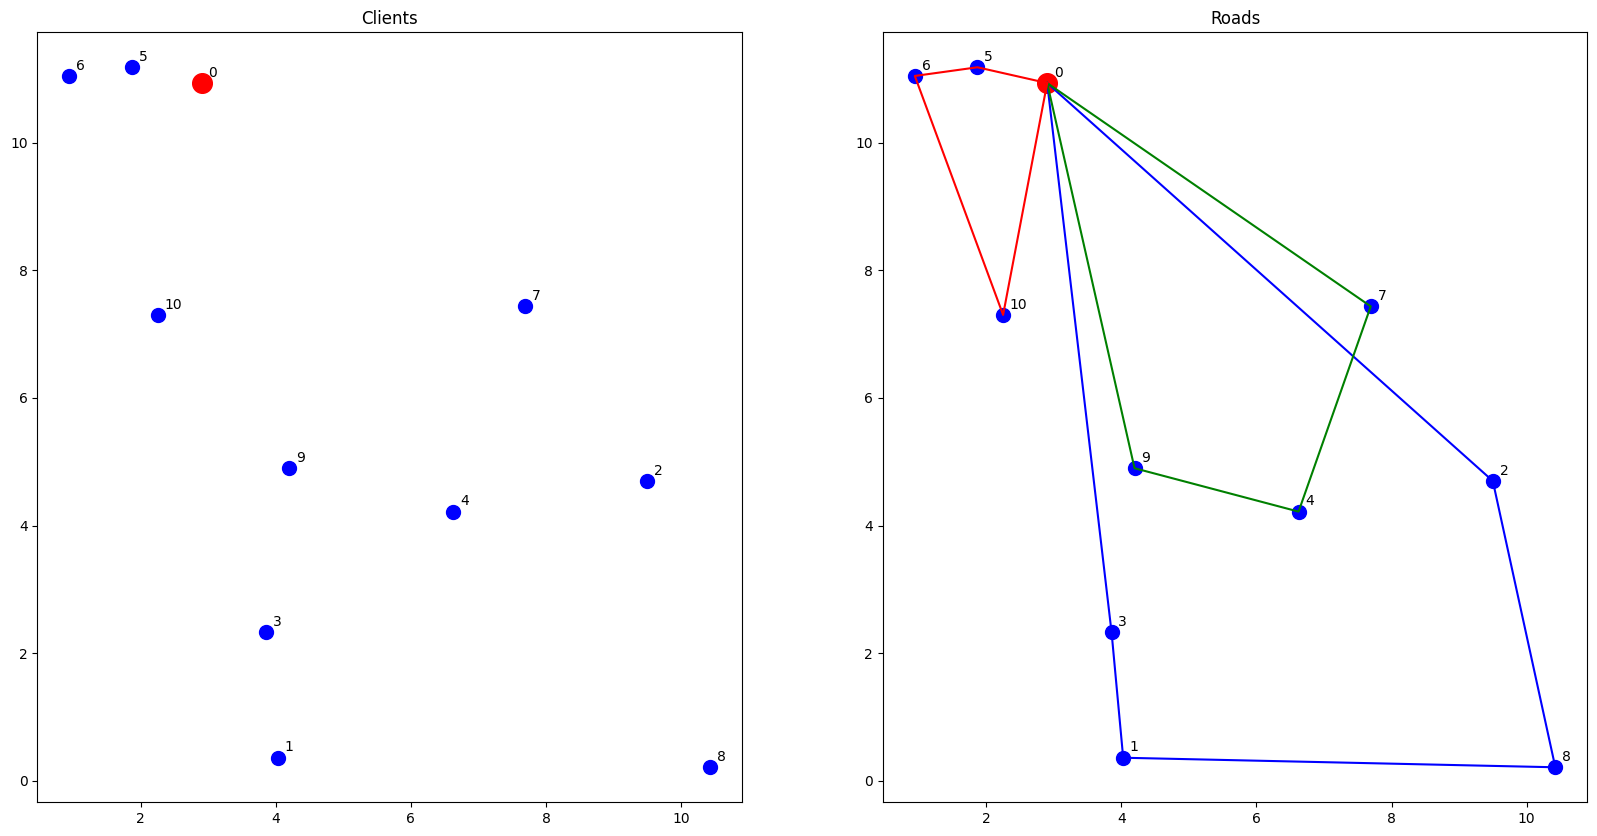

In [16]:
# --------------- Variables --------------- #
n = 10 # Number of clients
number_of_truck = 3 # Number of trucks
starting_point = 0 # Starting point
start_hour = 7 # Starting hour for the trucks

population_size = 100 # Size of the population generated by the genetic algorithm
k = 10 # Number of best individuals selected to reproduce
mutation_rate = 0.15 # Mutation rate

# --------------- Main --------------- #
matrix, xc, yc = generate_random_graph(n)
best_individual = genetic_algorithm(matrix, nb_truck=number_of_truck, starting_point=starting_point, population_size=population_size, mutation_rate=mutation_rate, start_hour=start_hour)

# --------------- Results --------------- #

    
print("-"*50)
print("Best individual:", best_individual)
print("Fitness:", round(fitness(best_individual, matrix, start_hour),2))
print("-"*50)

# For each truck, print the route and the distance
for truck in best_individual:
    distances = []
    for i in range(len(best_individual[truck]) - 1):
        distances.append(matrix[best_individual[truck][i]][best_individual[truck][i+1]])
    print("Truck:", truck, "Distance:", round(sum(distances),2), "Route:", best_individual[truck])

# Plot the graph
plot_graph(matrix, xc, yc, best_individual, best_individual)

<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;' id="plan">Plan d'expérience</h2>

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="whatplan">Qu'est ce qu'un plan d'expérience ?</h4>

Il s'agit d'une méthodologie qui vise à organiser et à structurer les différentes étapes d'une expérience scientifique ou d'une étude pour obtenir des résultats fiables et significatifs. C'est une approche systémique (l'approche systémique fait référence à une méthode d’analyse, une façon de traiter un système complexe avec un point de vue global sans se focaliser sur les détails) qui permet de déterminer comment les facteurs d'intérêt doivent être manipulés, quelles mesures doivent être prises et comment les données doivent être collectées et analysées.

A travers ce plan d’expérience, on cherche à évaluer la performances de notre algorithme. Les métriques d’évaluation sont le temps d’exécution et la qualité du résultat selon l’instance.

Pour la qualité de la solution, nous utiliserons un algorithme simplexe afin de trouver une borne inférieure qui représente une valeur optimale théorique et qui n'est pas forcément atteignable pour une instance souhaitée. Nous comparerons ensuite ce résultat avec le résultat de notre algorithme. Nous testerons une dizaine de fois chaque instance. Nous ferons ensuite une moyenne des résultats pour chaque instances testées.

Nous allons dans cette analyse, nous intéresser au comportement de notre algorithme dans deux cas :
- Performance : L'algorithme trouve une solution en un temps relativement raisonnable
- Qualité : L'algorithme produit une solution proche de la solution optimale

Pour cela, nous allons faire varier différents paramètres et observer les résultats comme par exemple : la taille de l'instance, le nombre de camion utilisé ou encore la taille de la population de notre algorithme génétique.

----------

Nous allons faire varier l’instance selon plusieurs paramètres d’entrée tel que :
- Le nombre de villes à livrer (sommets)
- Le nombre de camion
- La taille de la population généré par l’algorithme génétique
- Le taux de mutation

----------

Pour mesurer la qualité des solutions par rapport à la solution optimal, nous allons avoir recours à l'algorithme simplexe suivant :

In [17]:
def simplex_algorithm(matrix, nb_truck=truck):
    problem = pulp.LpProblem("VRP", pulp.LpMinimize)
    K = nb_truck
    n = len(matrix) - 1
    
    x = pulp.LpVariable.dicts("x", [(i,j,k) for i in range(n+1) for j in range(n+1) for k in range(K)], lowBound=0, upBound=1, cat='Binary')
    y = pulp.LpVariable.dicts("y", [(i,k) for i in range(n+1) for k in range(K)], lowBound=0, cat='Continuous')

    problem += pulp.lpSum([matrix[i][j]*x[(i,j,k)] for i in range(n+1) for j in range(n+1) for k in range(K)])

    # Chaque client est visité exactement une fois
    for i in range(1, n+1):
        problem += pulp.lpSum([x[(i,j,k)] for j in range(n+1) for k in range(K)]) == 1

    # Chaque véhicule quitte le dépôt
    for k in range(K):
        problem += pulp.lpSum([x[(0,j,k)] for j in range(1, n+1)]) == 1

    # Chaque véhicule revient au dépôt
    for k in range(K):
        problem += pulp.lpSum([x[(i,0,k)] for i in range(1, n+1)]) == 1

    # Lorsqu'un véhicule visite un client, il doit aussi partir de ce client
    for k in range(K):
        for i in range(1, n+1):
            problem += pulp.lpSum([x[(i,j,k)] for j in range(n+1)]) - pulp.lpSum([x[(j,i,k)] for j in range(n+1)]) == 0

    # # Elimination des sous-tours
    subtours = [] # Initializing the list of subtours
    for i in range(2, n + 1): # Iterating over the customers
        subtours += itertools.combinations(range(1, n + 1), i) # Creating a list of subtours

    for s in subtours: # Iterating over the subtours
        for k in range(K): # Iterating over the vehicles
            problem += pulp.lpSum(x[(i,j,k)] if i != j else 0 for i, j in itertools.permutations(s, 2)) <= len(s) - 1 # Setting the constraint for the subtours

    problem.solve()
    
    return pulp.value(problem.objective)

<h4 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="">Etude expérimentale</h4>

<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="">Mesure de la performance</h5>

Pour démarrer notre étude expérimentale, nous allons nous intéresser au temps d'exécution de notre algorithme. Pour cela, nous allons voir comment se comporte notre algorithme en fonction de la taille des instances. En réalisant des mesures du temps de calcul pris par le programme pour trouver une solution selon la taille d'une instance, cela va nous permettre de réaliser une interpolation qui donnera un ordre d'idée du temps auquel s'attendre.

IntProgress(value=0, layout=Layout(width='100%'), max=9)

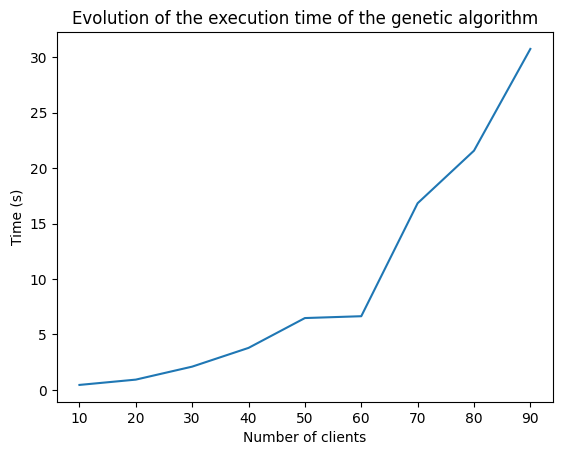

In [18]:
tailles = np.arange(10, 100, 10)
times = []

bar = IntProgress(min=0, max=len(tailles), layout={'width': '100%'})
display(bar)

for taille in tailles:
    matrix, xc, yc = generate_random_graph(taille)
    start = time.time()
    best_individual = genetic_algorithm(matrix, nb_truck=number_of_truck, starting_point=starting_point, population_size=population_size, mutation_rate=mutation_rate, start_hour=start_hour)
    end = time.time()
    times.append(end - start)
    bar.value += 1

# Remove progress bar
bar.close()

plt.plot(tailles, times)
plt.title("Evolution of the execution time of the genetic algorithm")
plt.xlabel("Number of clients")
plt.ylabel("Time (s)")
plt.show()

Dans un second temps, pour mesurer la performance de notre algorithme, nous souhaitons vérifier l'impact de deux paramètres sur le temps d'exécution. Nous pensons que c'est deux paramètres peuvent avoir un impact sur le fonctionnement de l'algorithme et c'est ce que nous souhaitons vérifier. Pour cela, nous allons faire varier la taille de la population ainsi que le taux de mutation. En effet, plus il y aura d'individu dans notre population, moins la convergence sera rapide et de plus si on augmente les chances de mutation, il en sera de même. <br/>
Tout d'abord on choisit une instance fixe qui sera la même dans la suite des analyses. Ainsi l'impact des paramètres ne dépendra pas de l'instance donnée :

In [19]:
matrix, xc, yc = generate_random_graph(10)
number_of_truck = 3
starting_point = 0
start_hour = 7
population_size = 30

IntProgress(value=0, layout=Layout(width='100%'), max=99)

IntProgress(value=0, layout=Layout(width='100%'), max=19)

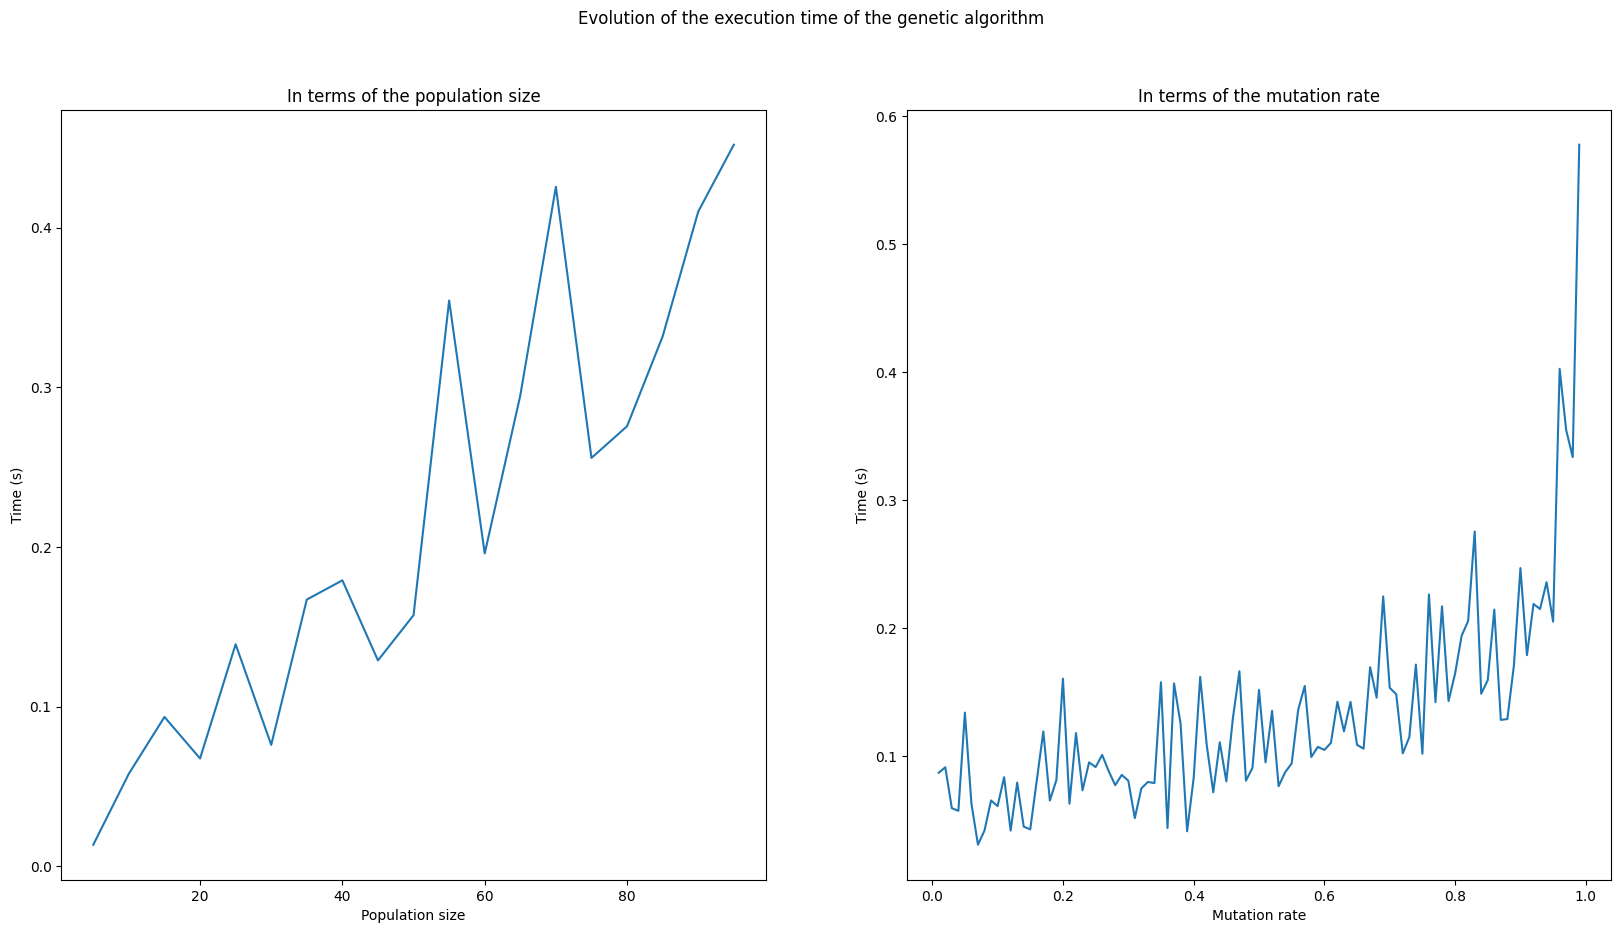

In [20]:
mut = np.arange(0.01, 1, 0.01, dtype=float)
times_mut = []

bar = IntProgress(min=0, max=len(mut), layout={'width': '100%'})
bar.value = 0
display(bar)

for mutation_rate in mut:
    start = time.time()
    best_individual = genetic_algorithm(matrix, nb_truck=number_of_truck, starting_point=starting_point, population_size=population_size, mutation_rate=mutation_rate, start_hour=start_hour)
    end = time.time()
    times_mut.append(end - start)
    bar.value += 1

# Remove progress bar
bar.close()

mutation_rate = 0.65

populations = np.arange(5, 100, 5)
times = []

bar = IntProgress(min=0, max=len(populations), layout={'width': '100%'})
bar.value = 0
display(bar)

for population in populations:
    start = time.time()
    best_individual = genetic_algorithm(matrix, nb_truck=number_of_truck, starting_point=starting_point, population_size=population, mutation_rate=mutation_rate, start_hour=start_hour)
    end = time.time()
    times.append(end - start)
    bar.value += 1

# Remove progress bar
bar.close()

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle("Evolution of the execution time of the genetic algorithm")

ax[0].plot(populations, times)
ax[0].set_title("In terms of the population size")
ax[0].set_xlabel("Population size")
ax[0].set_ylabel("Time (s)")

ax[1].plot(mut, times_mut)
ax[1].set_title("In terms of the mutation rate")
ax[1].set_xlabel("Mutation rate")
ax[1].set_ylabel("Time (s)")

plt.show()

<h5 style='text-align: left; color: #fbe216; padding:10px; margin-right: 50px;' id="">Mesure de la qualité</h5>

Dans un premier temps, nous nous somme intéressé à la performance de notre algorithme en regardant le temps d'exécution selon divers paramètres. Dans un second temps, nous allons vérifier la qualité de cet algorithme. En effet, il est intéressant d'avoir des temps d'exécution faibles, mais il faut tout de même avoir une solution qui soit la plus optimale possible.<br/>
On va donc s'intéresser en premier lieu, à la variation du nombre de camions. En effet dans l'implémentation de notre algorithmique génétique, nous avons fait le choix de répartir de manière plus ou moins égale le nombre de clients à servir entre les camions. Nous pensons que cette répartition de façon uniforme peut avoir un impact sur le résultat de l'algorithme. C'est pour cela que nous souhaitons voir si l'ajout de camions aura un impact ou non sur le résultat.<br/>
Pour cela, on conserve l'instance précédente.

IntProgress(value=0, layout=Layout(width='100%'), max=8)

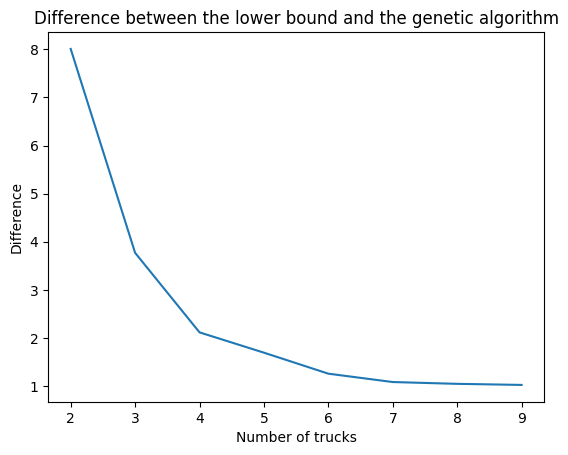

In [21]:
nb_truck = np.arange(2, 10, 1)
differences = []

bar = IntProgress(min=0, max=len(nb_truck), layout={'width': '100%'})
bar.value = 0
display(bar)

for truck in nb_truck:
    best_individual = genetic_algorithm(matrix, nb_truck=truck, starting_point=starting_point, population_size=population_size, mutation_rate=mutation_rate, start_hour=start_hour)
    simplex = simplex_algorithm(matrix, nb_truck=truck)

    differences.append((fitness(best_individual, matrix, departure_time=0)/ simplex))

    bar.value += 1

# Remove progress bar
bar.close()


plt.plot(nb_truck, differences)
plt.xlabel('Number of trucks')
plt.ylabel('Difference')
plt.title('Difference between the lower bound and the genetic algorithm')
plt.show()

Comme on peut le voir avec le graphique au dessus, à mesure que le nombre de camion augmente, l'algorithme génétique se rapproche de la borne inférieure calculée par le simplexe du fait que il y ait moins de sommets à distribuer par camions. Ceci peut s'expliquer par le fait que l'algorithme génétique répartit d'une façon uniforme le nombre de clients à livrer par camion ce qui n'est pas le cas du simplexe. Ainsi cette différence de calcul peut justifier nos écarts de résultats.

IntProgress(value=0, layout=Layout(width='100%'), max=99)

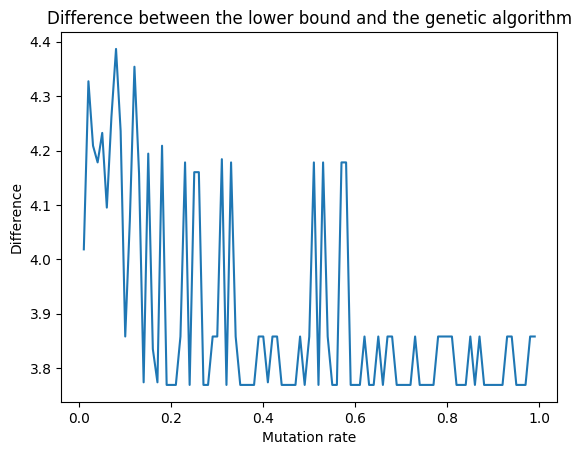

In [22]:
mut = np.arange(0.01, 1, 0.01, dtype=float)
differences = []

bar = IntProgress(min=0, max=len(mut), layout={'width': '100%'})
bar.value = 0
display(bar)

simplex = simplex_algorithm(matrix, nb_truck=number_of_truck)
for mutation_rate in mut:    
    best_individual = genetic_algorithm(matrix, nb_truck=number_of_truck, starting_point=starting_point, population_size=population_size, mutation_rate=mutation_rate, start_hour=start_hour)
    differences.append((fitness(best_individual, matrix, departure_time=0) / simplex))
    bar.value += 1

# Remove progress bar
bar.close()

plt.plot(mut, differences)
plt.xlabel('Mutation rate')
plt.ylabel('Difference')
plt.title('Difference between the lower bound and the genetic algorithm')
plt.show()

Le graphique précédent nous montre ainsi que plus le taux de mutation est élevé, plus le résultat de notre algorithme génétique est proche de la borne inférieure déterminée par le simplexe. Ainsi, plus notre taux de mutation est élevé plus la qualité est meilleure. Cependant comme vu précédemment, augmenter cette valeur ralenti considérablement l'exécution de l'algorithme.<br/>
On va maintenant déterminer l'impact de la taille de la population de notre algorithme génétique sur la qualité de ses résultats.

IntProgress(value=0, layout=Layout(width='100%'), max=99)

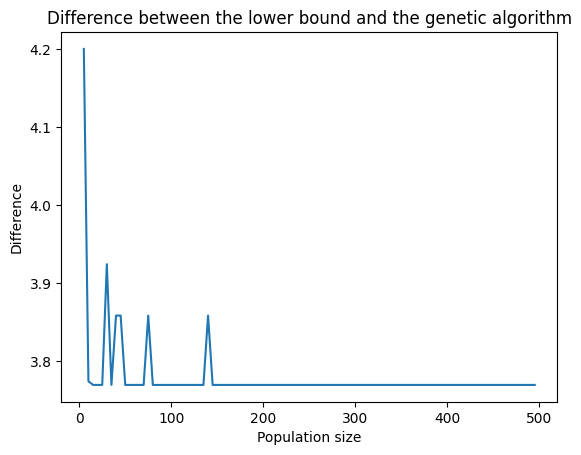

In [23]:
mutation_rate = 0.65

populations = np.arange(5, 500, 5)
differences = []

bar = IntProgress(min=0, max=len(populations), layout={'width': '100%'})
bar.value = 0
display(bar)

simplex = simplex_algorithm(matrix, nb_truck=number_of_truck)
for population in populations:
    best_individual = genetic_algorithm(matrix, nb_truck=number_of_truck, starting_point=starting_point, population_size=population, mutation_rate=mutation_rate, start_hour=start_hour)
    differences.append((fitness(best_individual, matrix, departure_time=0))/simplex)
    bar.value += 1

# Remove progress bar
bar.close()

plt.plot(populations, differences)
plt.xlabel('Population size')
plt.ylabel('Difference')
plt.title('Difference between the lower bound and the genetic algorithm')
plt.show()

Sur le grahiqe ce dessus, plus la population augmente plus la différence entre le simplex et l'algorithme génétique diminue. De plus on remarque qu'à partir de 30 générations, le différence stagne. A partir de ce point, il n'y a plus de meilleurs infividus.

{'whiskers': [<matplotlib.lines.Line2D at 0x21ee29dc3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21ee29dd610>,
 'boxes': [<matplotlib.lines.Line2D at 0x21ee29decd0>],
 'medians': [<matplotlib.lines.Line2D at 0x21ee0730710>],
 'fliers': [<matplotlib.lines.Line2D at 0x21ee0730910>],
 'means': []}

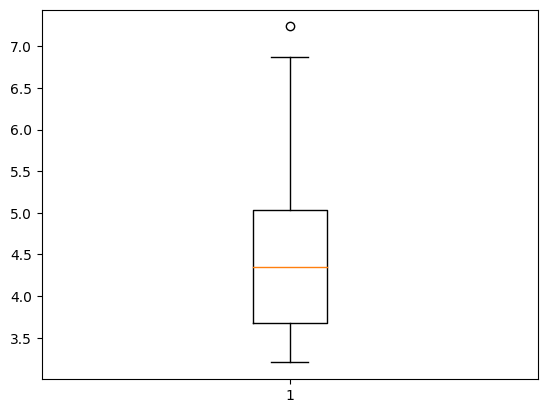

In [24]:
differences = []

for i in range(20):
    matrix, xc, yc = generate_random_graph(10)
    number_of_truck = 3
    starting_point = 0
    start_hour = 7
    population_size = 30
    mutation_rate = 0.65

    best_individual = genetic_algorithm(matrix, nb_truck=number_of_truck, starting_point=starting_point, population_size=population_size, mutation_rate=mutation_rate, start_hour=start_hour)
    simplex = simplex_algorithm(matrix, nb_truck=number_of_truck)

    differences.append((fitness(best_individual, matrix, departure_time=start_hour)/ simplex))

plt.boxplot(differences)

À travers ce plan expérimental, nous avons ainsi observé l'impact des différents paramètres tant sur sa performance que sur sa qualité.<br/><br/>
Nous avons constaté que plus les paramètres (taux de mutation, nombre de camions et taille de la population) ont une valeur élevée, plus le temps d'exécution augmente pour une même instance. Par ailleurs, il est à noter que plus leurs valeurs sont élevées, meilleure est la qualité de la solution. Ainsi, nous devons trouver un compromis entre qualité et performance pour trouver un bon équilibre et choisir nos paramètres en conséquence.<br/>
Cependant, il est aussi important de ne pas utiliser des valeurs trop élevées, notamment pour la taille de la population. Comme nous l'avons vu, passé une certaine valeur selon la taille de l'instance, la qualité de l'algorithme ne s'améliore plus.<br/><br/>
Ainsi, le choix des paramètres ne doit pas être une étape à prendre à la légère. Il est important de consacrer du temps à cette étude pour obtenir une solution qui est la plus qualitative tout en conservant la performance de notre algorithme.<br/><br/>
Tout au long de nos essais, nous avons réalisé nos expériences sur une instance de taille 10. Comme paramètres, nous avons donc choisi :
 - Une taille de population de 30 individus
 - Un taux de mutation de 65%
 - 3 camions


<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Conclusion</h2>

En conclusion, ce rapport a examiné en détail le problème du VRP (Vehicle Routing Problem) dans le contexte des variations de trafic. Nous avons abordé cette problématique complexe en concevant et en mettant en œuvre un algorithme dédié, dont les performances et l'efficacité ont été testées tout au long de notre recherche.<br/><br/>

Notre travail a permis d'observer que, malgré la complexité du problème du VRP avec variation de trafic, des solutions innovantes et adaptatives peuvent être développées. L'algorithme que nous avons conçu s'est avéré fonctionnel, avec une capacité notable à gérer les variations de trafic, même si ses résultats n'ont pas toujours été optimaux en raison de problèmes associés au simplexe utilisé.<br/><br/>

En effet, malgré le fait que notre simplexe n'ait pas été optimal, nous avons décidé de le conserver pour mener à bien notre plan d'expérience ainsi que nos analyses de performances et de qualité. Cela a parfois abouti à des valeurs non cohérentes, mettant en évidence des améliorations potentielles à apporter à notre modèle.<br/><br/>

Néanmoins, il est important de noter que ces résultats préliminaires ne compromettent en aucun cas la validité de notre approche. Au contraire, ils soulignent l'importance de continuer à affiner et améliorer notre algorithme. Il convient de prendre en compte les aspects spécifiques de la variation du trafic et d'intégrer les solutions de simplexe optimales à l'avenir.<br/><br/>

Finalement, ce projet a non seulement permis de renforcer notre compréhension du problème du VRP dans le contexte des variations de trafic, mais a également posé les bases pour des recherches futures. À travers l'itération, l'amélioration et la résolution des problèmes identifiés, nous sommes confiants dans le fait que nous pourrons développer une solution encore plus robuste et efficace pour traiter cette question complexe et omniprésente dans le domaine de la logistique avec l'enjeu écologique auquel nous faisons face.<br/><br/>

<h2 style='text-align: left; color: #fbe216; font-weight:bold; padding:10px; margin-right: 50px;'>Références</h2>
    <ul>
        <li><a href="https://en.wikipedia.org/wiki/Vehicle_routing_problem">Vehicule Routing Problem</a>, Wikipedia (19 Mai 2023)</li>
        <li><a href="https://en.wikipedia.org/wiki/Travelling_salesman_problem">Travelling Salesman Problem</a>, Wikipedia (21 Mai 2023) </li>
        <li><a href="https://www.i3s.unice.fr/~malapert/publications/malapert-06-FT.pdf">Optimisation de tournées de véhicules pour
l’exploitation de Réseau Telecom</a>, Arnaud Malapert, i3s.unice.fr (6 Septembre 2006) </li>
    <li><a href="https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj5n5if2K7_AhWzSaQEHQ-XCa8QFnoECAUQAQ&url=https%3A%2F%2Fwww.theses.fr%2F2016ARTO0203.pdf&usg=AOvVaw1ej2dEOSPQURBBChuKX1Nv">Les problèmes de collectes et livraisons avec collaboration et transbordements : modélisations et méthodes approchées</a>, Nicolas Danloup (1 décembre 2016)</li>
    <li><a href="https://dspace.univ-bba.dz/bitstream/handle/123456789/1556/R%C3%A9publique%20Alg%C3%A9rienne%20D%C3%A9mocratique%20et%20Populaire%20%281%29.pdf?sequence=1&isAllowed=y">Le problème de la tournée de véhicule avec
contrainte de capacité par l’algorithme
génétique </a>MEKHOUKH Lilia, GHEZALI Yamina (2020-2021)</li>
    <li><a href="https://perso.isima.fr/~lacomme/GT2L/Spring_School/conf/slides/ssiop-plenary-prins.pdf">Tour splitting algorithms for vehicle routing problem.</a> Prof. Christian Prins</li>
    <li><a href="https://www.lamsade.dauphine.fr/~jfro/JourneesPrecedentes/anciennesJournees/docs/jfro26/expose-1.pdf">Méthodes "route-first, cluster-second"
pour les tournées de véhicules</a> Christian Prins</li>
    <li><a href="https://neo.lcc.uma.es/vrp/solution-methods/">Solution Methods for VRP</a></li>
    <li><a href="https://libres.uncg.edu/ir/uncw/f/chengl2005-1.pdf">A genetic algorithm for the vehicle routing problem with time windows
</a>Lin Cheng, University of North Carolina Wilmington
2005</li>
    </ul>